# Polynomial Regression
- Polynomial regression is a type of regression analysis in which the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial.
- It is used when the data shows a curvilinear relationship that cannot be adequately captured by a simple linear regression model.
- The general form of a polynomial regression model is:
  
  \[
  y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_n x^n + \epsilon
  \]
  
  where:
  - \( y \) is the dependent variable,
  - \( x \) is the independent variable,
  - \( \beta_0, \beta_1, ..., \beta_n \) are the coefficients of the polynomial,
  - \( n \) is the degree of the polynomial,
  - \( \epsilon \) is the error term.
  - To fit a polynomial regression model, the following steps are typically followed:
    - Collect and preprocess the data. 
    - Choose the degree of the polynomial based on the data and the desired complexity of the model.
    - Transform the independent variable \( x \) into its polynomial features (e.g., \( x^2, x^3, ..., x^n \)).
    - Use a regression algorithm (like ordinary least squares) to estimate the coefficients \( \beta_0, \beta_1, ..., \beta_n \).
    - Evaluate the model's performance using metrics such as R-squared, Mean Squared Error (MSE), etc.
    - Visualize the results to assess the fit of the polynomial curve to the data points.
- Polynomial regression can be implemented using various programming languages and libraries, such as Python with libraries like NumPy, SciPy, and scikit-learn.
- It is important to be cautious about overfitting when using high-degree polynomials, as they can fit the training data very closely but may perform poorly on unseen data.
- Regularization techniques, such as Ridge or Lasso regression, can be employed to mitigate overfitting in polynomial regression models.
- Polynomial regression is widely used in various fields, including economics, biology, engineering, and social sciences, to model complex relationships between variables.
- Overall, polynomial regression is a powerful tool for capturing non-linear relationships in data, but it requires careful consideration of model complexity and validation to ensure robust performance.

In [4]:
## Importing Liberaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
X = 6 * np.random.rand(100, 1) - 3 ## Generates random values between -3 and 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1) ## Quadratic equation with some noise

Text(0, 0.5, 'y dataset')

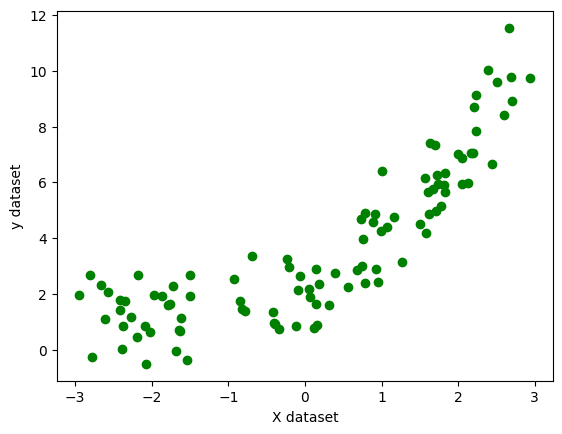

In [6]:
plt.scatter(X, y, color='green')
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
## Let's implement simple Linear Regression first
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [9]:
X_train

array([[-0.92022969],
       [ 1.0077676 ],
       [-2.60501434],
       [ 1.77154849],
       [ 2.38533453],
       [-1.86929767],
       [ 1.61362798],
       [ 1.16771243],
       [-2.0830449 ],
       [ 1.07372669],
       [-1.7635088 ],
       [-1.97448352],
       [-0.33388865],
       [-2.80428276],
       [ 0.11161818],
       [ 0.92257153],
       [ 1.69760237],
       [-1.67954762],
       [-0.24018665],
       [-1.53722041],
       [-2.38258748],
       [-0.84693445],
       [ 0.91844371],
       [ 0.95699546],
       [ 1.27072017],
       [ 2.2328481 ],
       [-1.79043045],
       [ 0.05515797],
       [ 2.23452349],
       [ 2.43651297],
       [ 2.19510136],
       [ 2.94202256],
       [-2.18514435],
       [-1.6496739 ],
       [-0.1213234 ],
       [ 0.7881783 ],
       [ 1.57871143],
       [-0.0877858 ],
       [-1.61656956],
       [ 2.1320465 ],
       [ 2.16976176],
       [ 1.99369983],
       [ 1.82307938],
       [ 0.18690162],
       [ 2.51272165],
       [-2

In [10]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
from sklearn.metrics import r2_score
sscore = r2_score(y_test, regression.predict(X_test))
print("R2 Score for Simple Linear Regression: ", sscore)

R2 Score for Simple Linear Regression:  0.7692809142354295


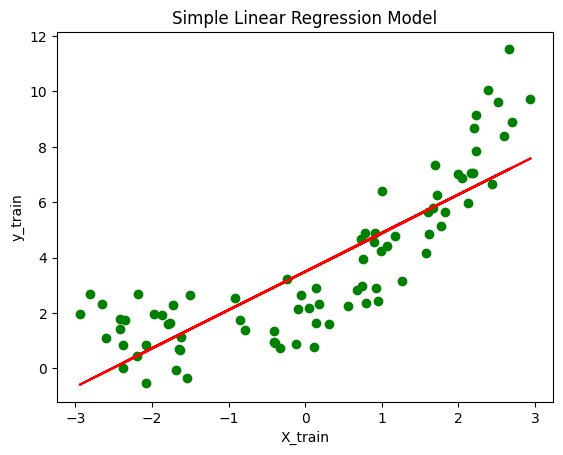

In [12]:
## Lets visualize the model
plt.plot(X_train, regression.predict(X_train), color='red')
plt.scatter(X_train, y_train, color='green')
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.title("Simple Linear Regression Model")
plt.show()

In [13]:
## Let's apply Polynomial transformation now
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=True) ## Creating polynomial features of degree 2

In [15]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
X_train_poly

array([[ 1.00000000e+00, -9.20229686e-01,  8.46822676e-01],
       [ 1.00000000e+00,  1.00776760e+00,  1.01559554e+00],
       [ 1.00000000e+00, -2.60501434e+00,  6.78609974e+00],
       [ 1.00000000e+00,  1.77154849e+00,  3.13838405e+00],
       [ 1.00000000e+00,  2.38533453e+00,  5.68982081e+00],
       [ 1.00000000e+00, -1.86929767e+00,  3.49427376e+00],
       [ 1.00000000e+00,  1.61362798e+00,  2.60379526e+00],
       [ 1.00000000e+00,  1.16771243e+00,  1.36355232e+00],
       [ 1.00000000e+00, -2.08304490e+00,  4.33907607e+00],
       [ 1.00000000e+00,  1.07372669e+00,  1.15288901e+00],
       [ 1.00000000e+00, -1.76350880e+00,  3.10996330e+00],
       [ 1.00000000e+00, -1.97448352e+00,  3.89858519e+00],
       [ 1.00000000e+00, -3.33888652e-01,  1.11481632e-01],
       [ 1.00000000e+00, -2.80428276e+00,  7.86400181e+00],
       [ 1.00000000e+00,  1.11618180e-01,  1.24586181e-02],
       [ 1.00000000e+00,  9.22571528e-01,  8.51138225e-01],
       [ 1.00000000e+00,  1.69760237e+00

In [17]:
X_test_poly

array([[ 1.00000000e+00,  1.73270249e+00,  3.00225793e+00],
       [ 1.00000000e+00,  6.08072032e-02,  3.69751597e-03],
       [ 1.00000000e+00, -2.77685937e+00,  7.71094793e+00],
       [ 1.00000000e+00, -1.50192774e+00,  2.25578695e+00],
       [ 1.00000000e+00,  1.62623265e+00,  2.64463262e+00],
       [ 1.00000000e+00,  1.56476337e+00,  2.44848441e+00],
       [ 1.00000000e+00,  3.97822541e-01,  1.58262774e-01],
       [ 1.00000000e+00, -2.56664959e+00,  6.58769013e+00],
       [ 1.00000000e+00, -2.27102546e+00,  5.15755662e+00],
       [ 1.00000000e+00, -6.93479814e-01,  4.80914252e-01],
       [ 1.00000000e+00, -2.02624494e+00,  4.10566857e+00],
       [ 1.00000000e+00,  2.69334975e+00,  7.25413289e+00],
       [ 1.00000000e+00, -2.06452624e-01,  4.26226859e-02],
       [ 1.00000000e+00,  1.70803999e+00,  2.91740061e+00],
       [ 1.00000000e+00,  1.50386219e+00,  2.26160149e+00],
       [ 1.00000000e+00,  1.80865833e+00,  3.27124495e+00],
       [ 1.00000000e+00,  1.83221177e+00

In [18]:
regression.fit(X_train_poly, y_train)
y_pred_poly = regression.predict(X_test_poly)
pscore = r2_score(y_test, y_pred_poly)
print("R2 Score for Polynomial Regression: ", pscore)

R2 Score for Polynomial Regression:  0.850525908108917


In [19]:
print("Polynomial Regression Coefficients:", regression.coef_)

Polynomial Regression Coefficients: [[0.         1.42808638 0.49759312]]


In [20]:
print("Polynomial Regression Intercept:", regression.intercept_)

Polynomial Regression Intercept: [2.04138367]


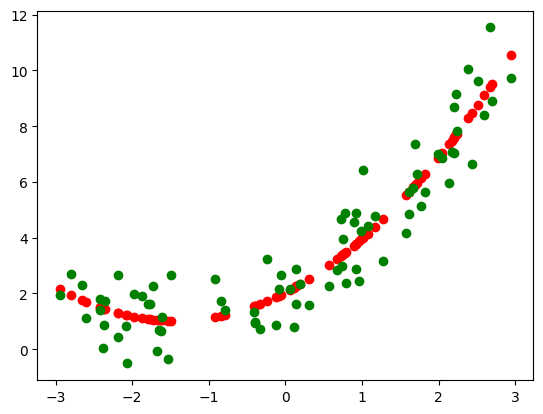

In [21]:
plt.scatter(X_train, regression.predict(X_train_poly) , color='red')
plt.scatter(X_train, y_train, color='green')

In [22]:
# What if we increase the degree of polynomial features to 3 or 4? Will it improve the model? Try it out yourself!
poly = PolynomialFeatures(degree=3, include_bias=True) ## Creating polynomial features of degree 3
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [23]:
X_train_poly

array([[ 1.00000000e+00, -9.20229686e-01,  8.46822676e-01,
        -7.79271365e-01],
       [ 1.00000000e+00,  1.00776760e+00,  1.01559554e+00,
         1.02348429e+00],
       [ 1.00000000e+00, -2.60501434e+00,  6.78609974e+00,
        -1.76778872e+01],
       [ 1.00000000e+00,  1.77154849e+00,  3.13838405e+00,
         5.55979953e+00],
       [ 1.00000000e+00,  2.38533453e+00,  5.68982081e+00,
         1.35721260e+01],
       [ 1.00000000e+00, -1.86929767e+00,  3.49427376e+00,
        -6.53183778e+00],
       [ 1.00000000e+00,  1.61362798e+00,  2.60379526e+00,
         4.20155689e+00],
       [ 1.00000000e+00,  1.16771243e+00,  1.36355232e+00,
         1.59223700e+00],
       [ 1.00000000e+00, -2.08304490e+00,  4.33907607e+00,
        -9.03849031e+00],
       [ 1.00000000e+00,  1.07372669e+00,  1.15288901e+00,
         1.23788771e+00],
       [ 1.00000000e+00, -1.76350880e+00,  3.10996330e+00,
        -5.48444766e+00],
       [ 1.00000000e+00, -1.97448352e+00,  3.89858519e+00,
      

In [24]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
pscore = r2_score(y_test, y_pred)
print(pscore)

0.8539562020735463


In [25]:
## Prediction of new data set
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

In [26]:
y_new = regression.predict(x_new_poly)

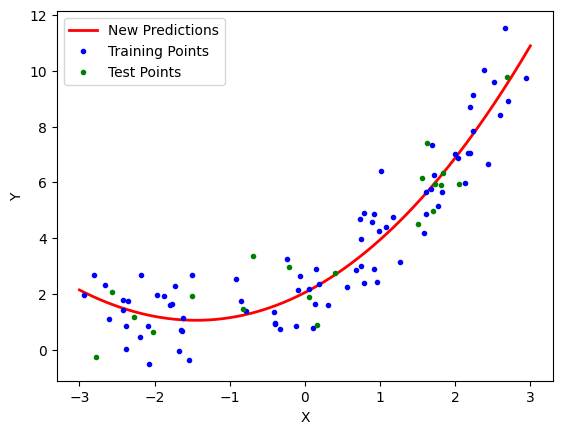

In [27]:
plt.plot(x_new, y_new, 'r-', linewidth=2, label='New Predictions')
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Test Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Pipeline Concepts

## What do you mean by pipeline?
A pipeline in data science and machine learning refers to a sequence of data processing steps that are executed in a specific order to transform raw data into a final model or output. Each step in the pipeline typically involves a specific task, such as data cleaning, feature extraction, model training, and evaluation. The main purpose of using a pipeline is to streamline the workflow, ensure reproducibility, and facilitate the management of complex processes.

## Why do we need a pipeline?
Pipelines are essential in data science and machine learning for several reasons:
1. **Automation**: Pipelines automate repetitive tasks, reducing the need for manual intervention and minimizing the risk of human error.
2. **Reproducibility**: By defining a clear sequence of steps, pipelines ensure that the same process can be repeated consistently, which is crucial for validating results and sharing work with others.
3. **Efficiency**: Pipelines can optimize the workflow by allowing parallel processing and reducing redundant computations, leading to faster execution times.
4. **Modularity**: Pipelines allow for the modular design of processes, making it easier to update or replace individual components without affecting the entire workflow.
5. **Scalability**: As datasets grow larger and more complex, pipelines help manage the increased complexity by organizing tasks into manageable segments.
6. **Collaboration**: In team environments, pipelines provide a structured framework that facilitates collaboration among team members by clearly defining roles and responsibilities for each step in the process.
7. **Model Management**: Pipelines help in tracking different versions of models and their associated preprocessing steps, making it easier to manage and deploy models in production environments.
8. **Error Handling**: Pipelines can include error handling mechanisms to manage exceptions and ensure that the process continues smoothly even when issues arise.
Overall, pipelines are a fundamental tool in data science and machine learning that enhance productivity, reliability, and maintainability of complex workflows.

In [28]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    linear_regression = LinearRegression()
    
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("linear_regression", linear_regression)
    ])
    
    poly_regression.fit(X_train, y_train) # Polynomial and fot of linear regression together
    y_pred_new = poly_regression.predict(x_new)
    
    # Plotting predictions line
    plt.plot(x_new, y_pred_new, 'r-', linewidth=2, label='Degree' + str(degree))
    plt.plot(X_train, y_train, 'b.', label='Training Points', linewidth=3)
    plt.plot(X_test, y_test, 'g.', label='Test Points', linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

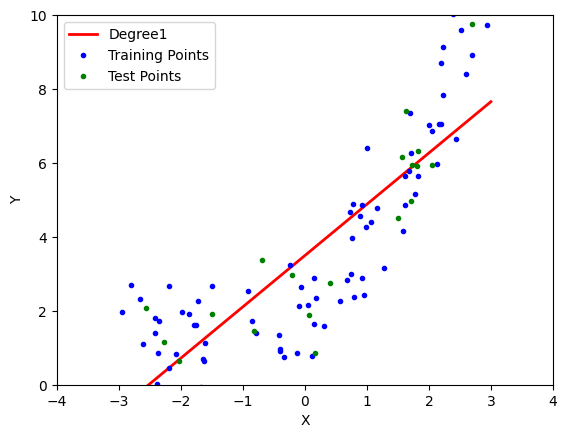

In [34]:
poly_regression(degree=1)

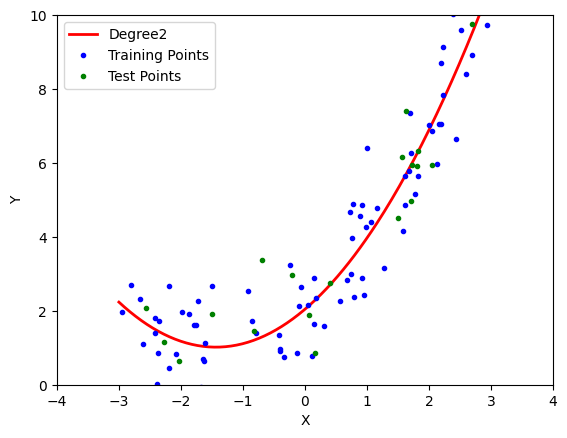

In [33]:
poly_regression(degree=2)

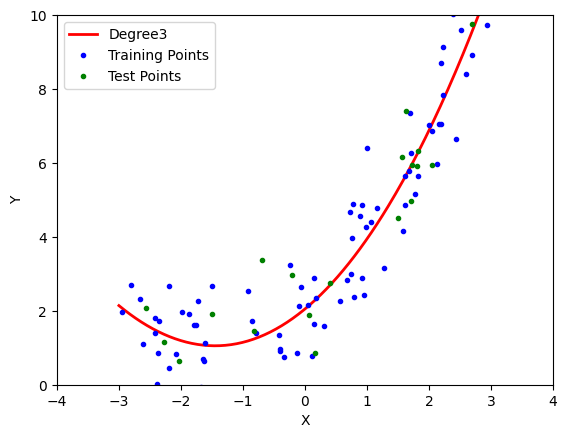

In [35]:
poly_regression(degree=3)

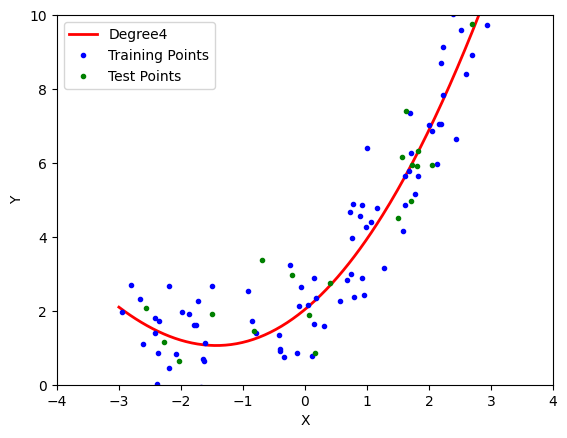

In [36]:
poly_regression(degree=4)

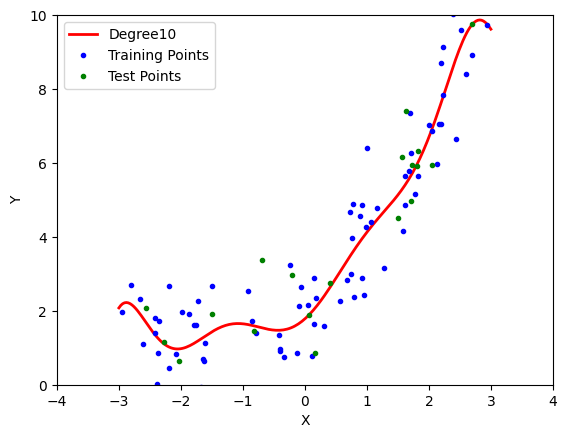

In [37]:
poly_regression(degree=10)